In [1]:
"""
A. For each tissue, enrichment [how likely are eSTRs to fall in TF sites]
Fisher test at each tissue
    Background: All STRs
    Forground: eSTRs that fall within TFs 

"""

# Libraries
from collections import defaultdict
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss
import seaborn as sns

OUTPATH = "../pdfs"
PREFIX = "SupllFigure2" # Keep as a variable in case we move things around!

#variables

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Ventricule",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUES = sorted([item for item in list(SHORTEN.keys())])
regr='/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'

In [12]:
 """choose feature between [ 'eSTRs', 'Causal', 'NonCausal']"""

feature='NonCausal'

feat_file = 'tfbs_%s_enrich.tab'%feature
#open files        ##tfbs Encode Lung     #Background : All STRs

# Cont. Table by Tissues
TFs = '/storage/szfeupe/Runs/650GTEx_estr/tfbs/Lungs/enrichment/'
transfacts = os.listdir(TFs)
transfacts = [x for x in transfacts if feat_file in x]

# Fisher test at tissues
DATA=[]
ODD =[]
for i in range (len(TISSUES)):
    # Data
    tis = TISSUES[i]
    data = pd.read_csv(TFs+tis+'_%s'%feat_file, sep='\t')       #open feature file
    
    data = data.loc[data['AB']>=50].copy()    #remove those with not enough data
    data = data.loc[data['AA']>0].copy()    #remove those with no causal (oddsratio will be =0)
    data['P.'+SHORTEN[tis]] = -np.log10(data['pval'])
    data['Odd.'+SHORTEN[tis]] = -np.log2(data['oddsratio'])
    #pvalues in tissue
    PV = data[['category','P.'+SHORTEN[tis]]]   
    DATA.append(PV)
    #odd ratios
    ODD.append(data[['category','Odd.'+SHORTEN[tis]]])
    
pdata=PV
oddpdata = data[['category','Odd.'+SHORTEN[tis]]]

for i in range (len(TISSUES)-1,-1,-1):
    #print(TISSUES[i], DATA[i].columns)
    pdata = pd.merge(pdata, DATA[i], on='category', how='outer')  
    oddpdata = pd.merge(oddpdata, ODD[i], on='category', how='outer')

indexname=pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/tfbs/Lungs/raw_tfbs/metadata.tsv', sep='\t')[['File accession','Experiment target']]
indexname.columns=['category','Target']

pdata.shape

(54, 19)

In [13]:
#Optional organizing

pdata['p.Enrichment'] = pdata.sum(axis=1)
oddpdata['odd.Enrichment'] = oddpdata.sum(axis=1)
pdata = pdata.sort_values('p.Enrichment', ascending=False)
oddpdata = oddpdata.sort_values('odd.Enrichment',ascending=False)
pdata['category']=[x.split('_')[1] for x in list(pdata['category'])]
pdata = pdata.merge(indexname, on=['category'])
pdata.index=[x.split('-')[0] for x in list(pdata['Target'])]

del pdata['Target']
del pdata['category']
del pdata['p.Enrichment']
del oddpdata['category']
del oddpdata['odd.Enrichment']

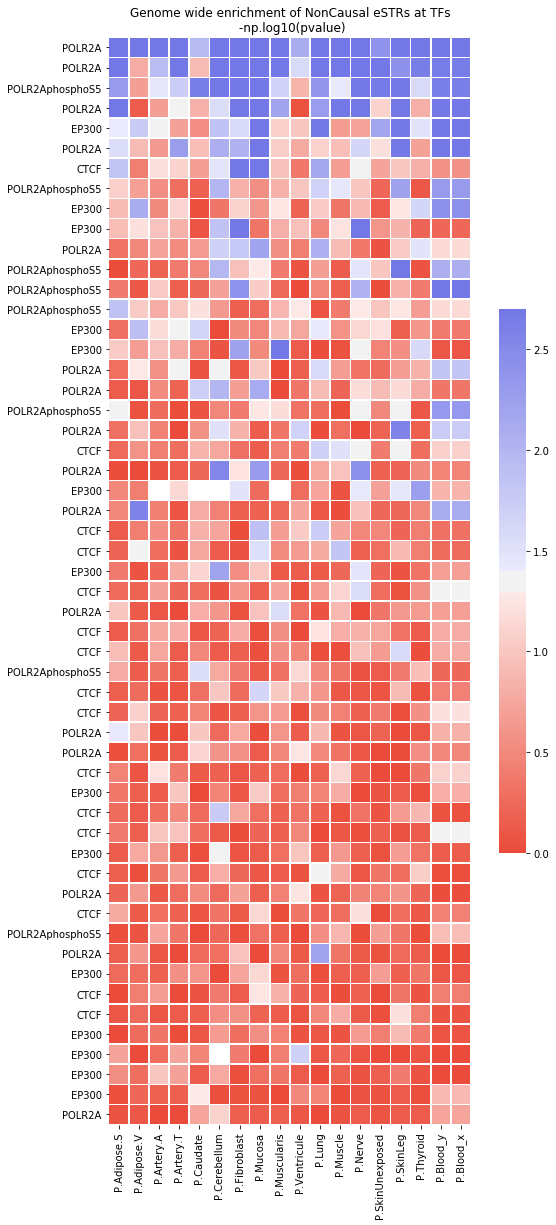

In [14]:
#Plot Enrichment of eSTRs at encode TF in Lung tissues [Targets were POLR2A]
fig, ax = plt.subplots(figsize=(10, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=2.7, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=list(pdata.columns), 
           yticklabels=[x for x in list(pdata.index)])
plt.title('Genome wide enrichment of NonCausal eSTRs at TFs\n -np.log10(pvalue)')
ax.invert_xaxis()
fig.savefig(os.path.join(OUTPATH, "%s_NonCausal_enrichment-at_TFs_Lungs.pdf"%PREFIX))
plt.show()

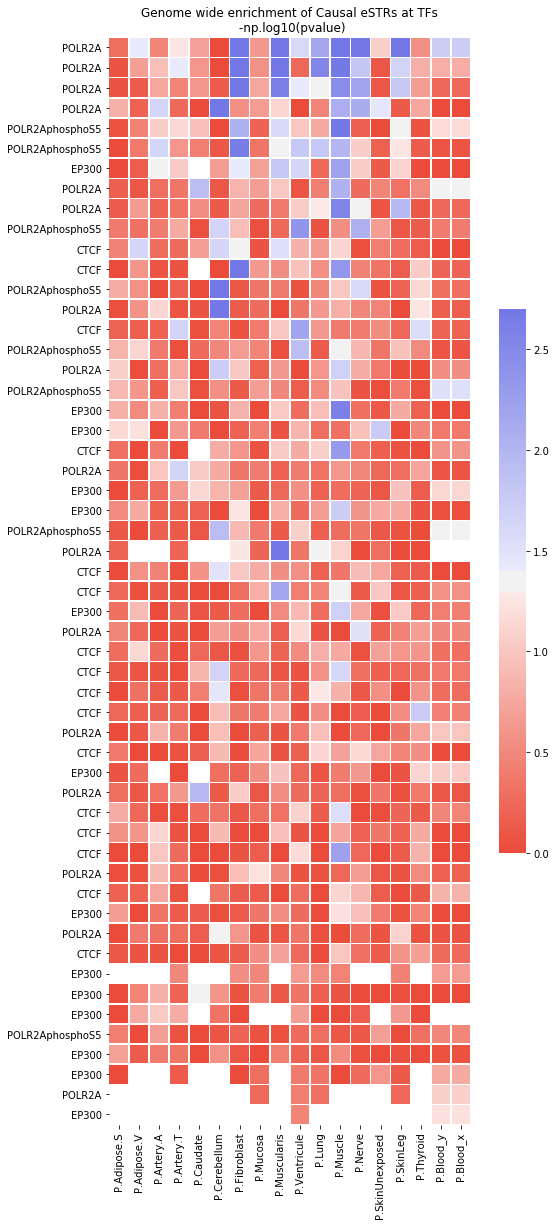

In [26]:
#Plot Enrichment of Causal eSTRs at encode TF in Lung tissues [Targets were POLR2A]
fig, ax = plt.subplots(figsize=(10, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=2.7, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=list(pdata.columns), 
           yticklabels=[x for x in list(pdata.index)])
plt.title('Genome wide enrichment of Causal eSTRs at TFs\n -np.log10(pvalue)')
ax.invert_xaxis()
plt.show()

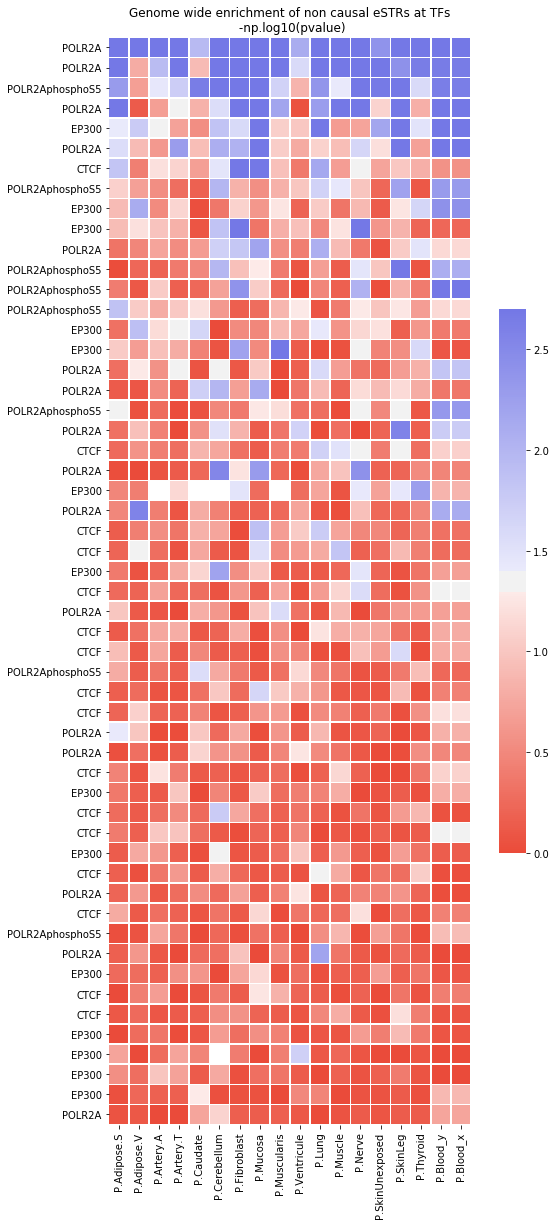

In [29]:
#Plot Enrichment of non causal eSTRs at encode TF in Lung tissues [Targets were POLR2A]
fig, ax = plt.subplots(figsize=(10, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=2.7, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=list(pdata.columns), 
           yticklabels=[x for x in list(pdata.index)])
plt.title('Genome wide enrichment of non causal eSTRs at TFs\n -np.log10(pvalue)')
ax.invert_xaxis()
plt.show()

In [22]:
pdata

,P.Blood_x,P.Blood_y,P.Thyroid,P.SkinLeg,P.SkinUnexposed,P.Nerve,P.Muscle,P.Lung,P.Ventricule,P.Muscularis,P.Mucosa,P.Fibroblast,P.Cerebellum,P.Caudate,P.Artery.T,P.Artery.A,P.Adipose.V,P.Adipose.S
POLR2A,7.949867,7.949867,2.804018,8.514750,0.282289,7.983388,5.276576,3.489084,0.910634,14.913785,2.974863,12.038571,3.086845,0.414020,5.768989,1.385481,1.765829,6.454022
POLR2A,2.058913,2.058913,2.225649,2.013255,0.380991,4.608334,5.157170,4.822384,1.693301,6.615784,2.149103,5.044580,2.420671,0.955339,4.083319,1.813433,1.875269,4.230480
POLR2A,1.970827,1.970827,1.436889,2.862767,0.115347,4.005498,1.651226,2.129660,0.188094,4.535210,0.740084,2.315895,1.602145,0.210528,0.566369,0.306534,1.134449,2.286474
POLR2AphosphoS5,2.529891,2.529891,1.382591,2.360277,0.065563,2.937714,0.814115,1.775272,0.395801,2.486269,0.448162,2.718951,0.955614,0.444704,1.269280,0.254866,0.271998,4.203480
POLR2A,2.054312,2.054312,0.164290,3.270398,-0.000000,3.651819,1.616413,1.553925,0.646287,2.223499,1.256245,3.651707,0.496051,0.413075,0.551005,0.775211,0.370126,2.200815
EP300,2.564475,2.564475,0.641394,1.668125,0.725985,1.592330,1.318323,2.168877,0.145444,1.912743,2.077614,1.897395,0.117750,0.446555,1.573781,0.311751,0.263196,2.287667
POLR2AphosphoS5,1.642371,1.642371,0.832173,0.296712,0.433123,2.266813,0.972523,0.316601,0.235301,2.785978,0.246561,3.460323,0.285024,0.341252,0.598324,1.693325,0.062825,1.510975
EP300,1.150401,1.150401,1.027293,1.419598,0.724624,0.087999,0.156769,1.465516,0.792005,1.352917,0.045322,3.008105,0.390418,1.265232,2.228355,1.599124,-0.000000,1.418561
POLR2AphosphoS5,0.934187,0.934187,0.778263,1.923088,0.106657,3.477098,0.389203,0.211151,0.611829,2.163188,0.239154,1.416592,0.395533,1.496426,0.121364,0.664699,0.268166,2.482371
POLR2A,0.289574,0.289574,0.231912,0.418706,1.429336,4.666268,0.391630,1.239448,0.568961,0.394052,1.078572,1.674941,0.698006,2.862008,0.683167,0.508562,0.342428,0.782630
